<a href="https://colab.research.google.com/github/Dvitee/Task-6/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

In [5]:
# 1. Load the dataset from CSV
df = pd.read_csv("iris.csv")  # Make sure iris.csv is uploaded
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# 2. Prepare X and y (using only the first 2 features for 2D visualization)
X = df.iloc[:, :2].values  # First two columns: sepal length & width
y = df.iloc[:, -1].values  # Assuming the last column is the target

In [7]:
# 3. Encode target if it's string (optional)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
# 4. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [10]:
# 6. Try different values of K
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k}, Accuracy = {acc:.4f}")

K = 1, Accuracy = 0.7111
K = 2, Accuracy = 0.7333
K = 3, Accuracy = 0.8000
K = 4, Accuracy = 0.7556
K = 5, Accuracy = 0.8000
K = 6, Accuracy = 0.8222
K = 7, Accuracy = 0.8000
K = 8, Accuracy = 0.8000
K = 9, Accuracy = 0.8222
K = 10, Accuracy = 0.7333


In [11]:
# 7. Optimal K (assume k=5) and fit model
k_optimal = 5
model = KNeighborsClassifier(n_neighbors=k_optimal)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# 8. Evaluation
y_pred = model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[19  0  0]
 [ 0  7  6]
 [ 0  3 10]]
Accuracy: 0.8


In [13]:
# 9. Decision Boundary Plot
h = .02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

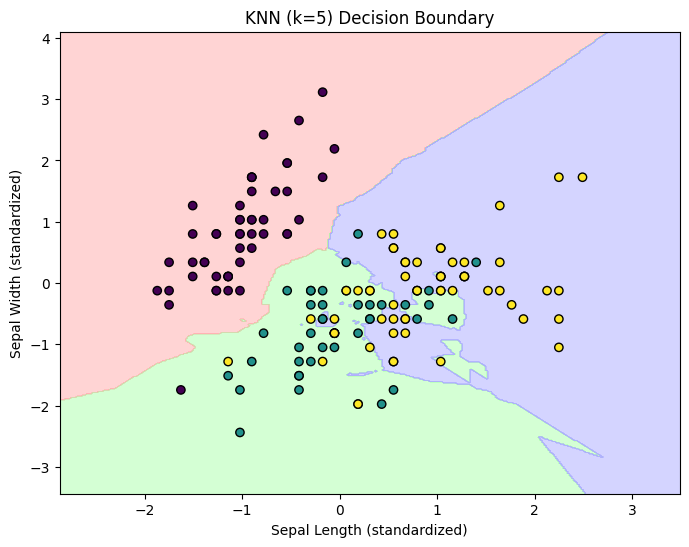

In [14]:
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k')
plt.title(f"KNN (k={k_optimal}) Decision Boundary")
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.show()